<a href="https://colab.research.google.com/github/JanSchering/Thesis/blob/main/fitzhugh_kapral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Microscopic model for FitzHugh-Nagumo dynamics](https://journals.aps.org/pre/pdf/10.1103/PhysRevE.55.5657)

original Fitzhugh-Nagumo equation:

$$
u_\tau = -u^3 + u - v \\
v_\tau = \epsilon(u - \alpha v - \beta)
$$

Spatially distributed form:

$$
u_\tau = -u^3 + u - v + D_u \nabla^2 u \\
v_\tau = \epsilon(u - \alpha v - \beta) D_v \nabla^2 v
$$

This paper:  depart from the standard interpretation of the
FitzHugh-Nagumo (FHN) model in terms of nerve impulse
physiology and devise a chemical scheme whose mass-action
law is the FHN equation. The goal is to construct a microscopic collision dynamics corresponding to the
mechanism and implement it in the context of a lattice-gas
automaton.

## Fitzhugh-Nagumo reaction kinetics



## Lattice-Gas Model

Once a chemical mechanism is known it is possible to
devise a microscopic reactive collision dynamics that accounts for the steps in the mechanism. In the paper, the mechanism is implemented as a reactive lattice-gas automaton. 

### Notation

- $\mathcal{L}$: The coordinate space of the model. A regular Bravais lattice is used
- $\mathcal{l}$: An elementary site on the lattice
- $\mathcal{B}$: The space of all possible site conffigurations
- each site $\mathcal{l}$ can be occupied by a number of particles
  - the occupation numbers of different species are independent
  - it follows that $\mathcal{B}$ is a direct product of particle states


### Brownian Motion

The model uses an additional "excited" substate $\mathbb{E}$. Motion then works through a 3-step algorithm:

1. Transfer at most 1 particle per side to the excited state, with a probability depending on the site occupation number
2. Translate the excited particles in a random direction chosen from a set of directions $V={v_1,\dots, v_k}$
3. Accomodate the excited particles at their new locations

-> Two restrictions immediately follow from our definition.
- Only $N$ particles of a species can reside at a site ==> $p(N)=1$
- We can't create excited particles out of nothing ==> $p(0)=0$

We can specify this algorithm using the example of translating particles of a species $A$:

The lattice state is defined by the substates of the species $A$, $\mathbb{A}$ and the auxiliary excited species E, $\mathbb{E}$.

$$\mathbb{L}=(\mathbb{A},\mathbb{E})$$

If we define the maximum occupation number as $N$, then we can express the algorithm as:

$$
\mathcal{D} = \mathcal{C}_\alpha \circ \mathcal{T}_v \circ \mathcal{C}_\tau
$$

**$\mathcal{C}_\tau$** 
****

$\mathcal{C}_\tau$ is a lattice operator corresponding to 1. (transfer a particle to the "excited" state). The lattice operator defines the application of the following site operator independently at each site $\mathcal{l}=(n,e)$, where $n$ is the number of molecules of species $A$ at site $\mathcal{l}$ and $e$ is the number of excited particles at site $\mathcal{l}$:

$$
\tau(n,e) = \textbf{(} (n-\theta(n-N\xi)),\theta(n-N\xi)\textbf{)}
$$

Here, $\theta$ is the heaviside function and $\xi$ is a continuous uniform random variable on (0,1).

**$\mathcal{T}_v$**
****
Translate $\mathbb{E}$ into a random direction $v$. Corresponds to 2.

**$\mathcal{C}_\alpha$**
****
$\mathcal{C}_\alpha$ is a lattice operator that corresponds to 3. ("Accomodate the excited particles at their new locations"). It defines the application of the following site operator to each site $\mathcal{l}$:

$$
\alpha(n,e) = \textbf{(} (n+e), (0) \textbf{)}
$$

In [1]:
from typing import Tuple, List
from enum import Enum
import torch as t
from torch.distributions import uniform
import random
from IPython.display import Image
from IPython import display
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
from diffusion import Direction2D, diffuse, translate, excite_particles

c:\Users\jsche\anaconda3\envs\torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
state = t.zeros((3,3))
state[0,0] = 1
state[1,0] = 1
state[1,1] = 1
print(state)

translate(state, Direction2D.North_West)

tensor([[1., 0., 0.],
        [1., 1., 0.],
        [0., 0., 0.]])


tensor([[1., 0., 1.],
        [0., 0., 0.],
        [0., 0., 1.]])

In [5]:
grid = t.zeros((2,3,3))
grid[:,1,1] = 250
for i in range(20):
  grid = diffuse(grid, 256, 0.5, 0.5)
  print(grid[0])

tensor([[  0.,   0.,   0.],
        [  0., 250.,   0.],
        [  0.,   0.,   0.]])
tensor([[  0.,   0.,   0.],
        [  0., 249.,   1.],
        [  0.,   0.,   0.]])
tensor([[  0.,   0.,   0.],
        [  0., 249.,   1.],
        [  0.,   0.,   0.]])
tensor([[  0.,   0.,   0.],
        [  0., 249.,   1.],
        [  0.,   0.,   0.]])
tensor([[  0.,   0.,   0.],
        [  0., 249.,   1.],
        [  0.,   0.,   0.]])
tensor([[  0.,   0.,   0.],
        [  0., 249.,   1.],
        [  0.,   0.,   0.]])
tensor([[  0.,   0.,   0.],
        [  0., 248.,   1.],
        [  0.,   1.,   0.]])
tensor([[  0.,   0.,   0.],
        [  0., 247.,   1.],
        [  0.,   2.,   0.]])
tensor([[  0.,   0.,   0.],
        [  0., 247.,   1.],
        [  0.,   2.,   0.]])
tensor([[  0.,   0.,   0.],
        [  1., 246.,   1.],
        [  0.,   2.,   0.]])
tensor([[  0.,   0.,   0.],
        [  1., 246.,   1.],
        [  0.,   2.,   0.]])
tensor([[  0.,   0.,   0.],
        [  1., 246.,   1.],
        [

c:\Users\jsche\anaconda3\envs\torch\lib\site-packages\torch\distributions\distribution.py:159: UserWarning: sample_n will be deprecated. Use .sample((n,)) instead
  warnings.warn('sample_n will be deprecated. Use .sample((n,)) instead', UserWarning)


In [11]:
grid = t.zeros((2,50,50))
grid[:,15:30] = 200
print(t.sum(grid))

tensor(300000.)


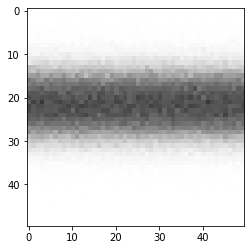

tensor(300000.)

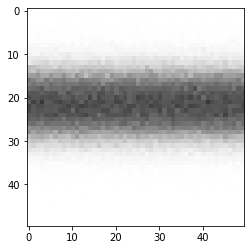

In [12]:
N = 256 
for i in range(10_000):
  if i % 100 == 0:
    display.clear_output(wait=True)
    plt.imshow(grid[0], cmap="Greys", interpolation="nearest", vmin=0, vmax=256)
    display.display(plt.gcf())
  grid = diffuse(grid, N, 0.5, 0.5)
t.sum(grid)

## Reactive Dynamics

The lattice state $\mathbb{L}$ is given by $\mathbb{L} = (\mathbb{A}, \mathbb{B})$. Each lattice site $\mathcal{l}$ is then defined by the occupation numbers
$\mathcal{l} = (n,m)$, where $n$ is the number of particles of species A and $m$ the number of particles of species B currently residing at site $\mathcal{l}$.

The reaction rule is carried out by randomly choosing one of 6 possible reaction channels ($r=6$). Each channel is assigned an equal weight in the choice. The reactive dynamics arise from birth-death processes based on the 6 possible reaction channels. The probability of a reaction also depends on the chosen channel and is given by:

$$
p_1(n,m) = \gamma \overline{k_1} n (n-1)(N-n) \\
p_2(n,m) = \gamma \overline{k^*_1} n (N-n) (N-1-n) \\
p_3(n,m) = \gamma \overline{k_2} (N-n)m \\
p_4(n,m) = \gamma \overline{k^*_2} n(N-m) \\
p_5(n,m) = \gamma \overline{k^*_3} (N-n)(N-m) \\ 
p_6(n,m) = \gamma \overline{k_3}n m
$$

- $\gamma$ is a scale factor that controls the timescale of the reaction 
- $\overline{k_1} = k_1 / [(N-1)(N-2)]$
- $\overline{k_1^*} = k_1^* / [(N-1)(N-2)]$
- $\overline{k_2} = k_2 / N$
- $\overline{k_2^*} = k_2^* / N$
- $\overline{k_3} = k_3 / N$
- $\overline{k_3^*} = k_3^* / N$

where $k_i$ and $k_i^*$ are the reaction rate coefficients.

****

We can use the probabilities to define the site operators for the reactive dynamics. Let $\xi$ be a random continuous uniform variable on (0,1), then:

$$
\sigma_1(n,m) = (n + \theta(p_1 - \xi), m) \\
\sigma_2(n,m) = (n - \theta(p_2 - \xi), m) \\
\sigma_3(n,m) = (n + \theta(p_3 - \xi), m) \\
\sigma_4(n,m) = (n - \theta(p_4 - \xi), m) \\
\sigma_5(n,m) = (n, m + \theta(p_5 - \xi)) \\
\sigma_6(n,m) = (n, m - \theta(p_6 - \xi))
$$

We can combine these operators into a site operator for the local reaction rule. Let $\nu$ be a discrete random variable on the domain $\{1,\dots,r\}$, then:

$$
\rho(n,m) = \sum_{j=1}^6 \delta_{\nu j} \sigma_j(n,m)
$$

where $\delta_{\nu j}$ is the kronecker delta and is equal to 1 if $j = \nu$, 0 otherwise.

In [ ]:
def p1(state:t.Tensor, N:int, gamma:float, k1:float) -> t.Tensor:
  n = state[0]
  m = state[1]
  k1_bar = k1 / ((N-1) * (N-2))
  return gamma * k1_bar * n * (n-1) * (N - n)

def p2(state:t.Tensor, N:int, gamma:float, k1_star:float) -> t.Tensor:
  n = state[0]
  m = state[1]
  k1_star_bar = k1_star /  ((N-1) * (N-2))
  return gamma * k1_star_bar * n * (N-n) * (N-1-n)

def p3(state:t.Tensor, N:int, gamma:float, k2:float) -> t.Tensor:
  n = state[0]
  m = state[1]
  k2_bar = k2 / N
  return gamma * k2_bar * (N - n) * m

def p4(state:t.Tensor, N:int, gamma:float, k2_star:float) -> t.Tensor:
  n = state[0]
  m = state[1]
  k2_star_bar = k2_star / N
  return gamma * k2_star_bar * n * (N - m)

def p5(state:t.Tensor, N:int, gamma:float, k3:float) -> t.Tensor:
  n = state[0]
  m = state[1]
  k3_bar = k3 / N
  return gamma * k3_bar * (N - n) * (N - m)

def p6(state:t.Tensor, N:int, gamma:float, k3_star:float) -> t.Tensor:
  n = state[0]
  m = state[1]
  k3_star_bar = k3_star / N
  return gamma * k3_star_bar * n * m

probability_funcs = [p1,p2,p3,p4,p5,p6]

In [ ]:
def sigma(state:t.Tensor, channel:int, N:int, gamma:float, rate_coefficients: List[float]):
  grid_dim = state.shape[-1]
  rate_coefficient = rate_coefficients[channel]
  reaction_prob = probability_funcs[channel](state, gamma, N, rate_coefficient)
  threshold = uniform.Uniform(0,1).sample_n(grid_dim**2).reshape(grid_dim, grid_dim)
  if channel == 0 or channel == 2:
    state[0] = state[0] + t.heaviside(reaction_prob - threshold, values=t.zeros(grid_dim, grid_dim))
  elif channel == 1 or channel == 3:
    state[0] = state[0] - t.heaviside(reaction_prob - threshold, values=t.zeros(grid_dim, grid_dim))
  elif channel == 4:
    state[1] = state[1] + t.heaviside(reaction_prob - threshold, values=t.zeros(grid_dim, grid_dim))
  elif channel == 5:
    state[1] = state[1] - t.heaviside(reaction_prob - threshold, values=t.zeros(grid_dim, grid_dim))
  return state

In [ ]:
def rho(state:t.Tensor, N:int, gamma:float, rate_coefficients: List[float]):
  channel = t.randint_like()
  channel = random.randint(0,5)
  return sigma(state, channel, N, gamma, rate_coefficients)

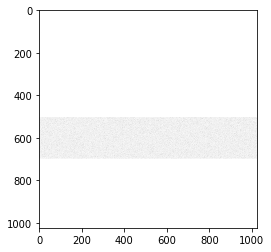

 12%|█▏        | 1210/10000 [01:22<09:57, 14.71it/s]


KeyboardInterrupt: ignored

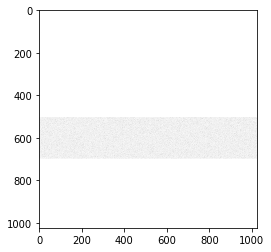

In [ ]:
grid = t.zeros((2,1024,1024))
grid[:,500:700] = 200
N = 256 
gamma = 0.6
rate_coefficients = [0.98,0.98,0.1,0.1,0.2,0.2]
for i in tqdm(range(10_000)):
  if i % 500 == 0:
    display.clear_output(wait=True)
    plt.imshow(grid[0], cmap="Greys", interpolation="nearest", vmin=0, vmax=256)
    display.display(plt.gcf())
  grid = rho(grid, N, gamma, rate_coefficients)
  grid = diffuse(grid, N)
  #display.clear_output(wait=True)
  #time.sleep(0.02)